This notebook has the code for running the survival analysis, which examines the behavior of each group throughout the observation by scoring group behavior in two minute clips with 5 minute gaps between each clip.

In [16]:
# load packages
import numpy as np
import pandas as pd
import lifelines as ll
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
import matplotlib.pyplot as plt
from lifelines.utils import median_survival_times

In [17]:
# import data
df = pd.read_csv('data/whole_observation_clean.csv')

In [18]:
# Get data into proper format for lifelines package
surv = df[['observation', 'species']].drop_duplicates()
surv['duration'] = np.nan
surv['event'] = np.nan

for i in df.observation.unique():
    sub = df[df.observation == i]
    for s in sub.species.unique():
        sub2 = sub[sub.species == s]
        if sub2.group_behavior.min() == 0:
            E = 1
            T = sub2[sub2['group_behavior'] == 0.0]['ob_time'].min()
            surv.loc[(surv['observation'] == i) & (surv['species'] == s), 'event'] = 1
            surv.loc[(surv['observation'] == i) & (surv['species'] == s), 'duration'] = T
        else:
            E = 0
            T = sub2['ob_time'].max()
            surv.loc[(surv['observation'] == i) & (surv['species'] == s), 'event'] = 0
            surv.loc[(surv['observation'] == i) & (surv['species'] == s), 'duration'] = T
surv.head()

,observation,species,duration,event
0,2,buf,14.0,1.0
3,3,pz,7.0,1.0
6,5,buf,7.0,0.0
8,8,pz,0.0,1.0
11,12,buf,14.0,0.0


<AxesSubplot:xlabel='timeline'>

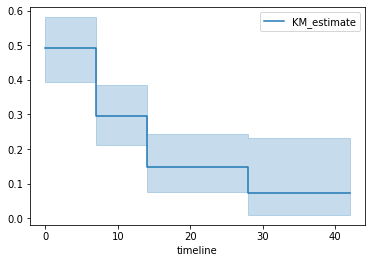

In [19]:
T = surv['duration']
E = surv['event']
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

kmf.survival_function_
kmf.cumulative_density_
kmf.plot_survival_function()

<AxesSubplot:xlabel='timeline'>

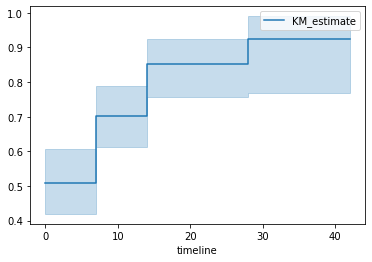

In [20]:
kmf.plot_cumulative_density()

In [21]:
kmf.median_survival_time_

0.0

In [22]:
median_ = kmf.median_survival_time_
median_ci = median_survival_times(kmf.confidence_interval_)
median_, median_ci

(0.0,
      KM_estimate_lower_0.95  KM_estimate_upper_0.95
 0.5                     0.0                     7.0)

<AxesSubplot:xlabel='timeline'>

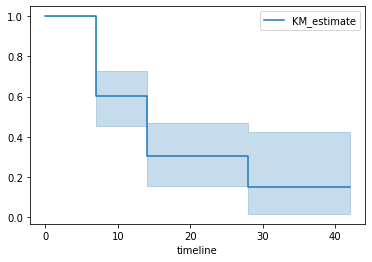

In [24]:
surv_agitated = surv[surv['duration']>0]
T2 = surv_agitated['duration']
E2 = surv_agitated['event']
kmf = KaplanMeierFitter()
kmf.fit(T2, event_observed=E2)

kmf.survival_function_
kmf.cumulative_density_
kmf.plot_survival_function()

<AxesSubplot:xlabel='timeline'>

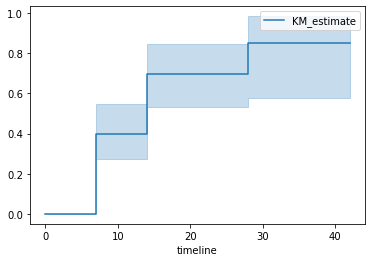

In [25]:
kmf.plot_cumulative_density()

In [27]:
median_ = kmf.median_survival_time_
median_ci = median_survival_times(kmf.confidence_interval_)
median_, median_ci

(14.0,
      KM_estimate_lower_0.95  KM_estimate_upper_0.95
 0.5                     7.0                    14.0)

<AxesSubplot:xlabel='ob_time', ylabel='group_behavior'>

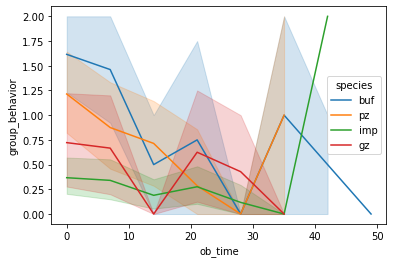

In [10]:
import seaborn as sns
sns.lineplot(data = df, x = 'ob_time', y = 'group_behavior', hue = 'species')

In [13]:
df[df['species']=='buf']

,observation,flight_num,clip_num,ob_time,flight_time,species,group_behavior
0,2,1,1,0,3:24,buf,1.0
1,2,1,2,7,10:24,buf,2.0
2,2,1,3,14,17:24,buf,0.0
6,5,1,1,0,2:44,buf,2.0
7,5,1,2,7,9:44,buf,1.0
11,12,1,1,0,2:40,buf,1.0
12,12,1,2,7,9:40,buf,1.0
13,12,1,3,14,16:40,buf,1.0
82,41,1,1,0,2:06,buf,1.0
83,41,1,2,7,9:06,buf,1.0


In [ ]:
# create data frame with columns for group identifier, species, 
# time point, starting 

In [30]:
len(surv_agitated)

48

In [35]:
df[(df['ob_time'] == 0) & (df['group_behavior']>0)]

,observation,flight_num,clip_num,ob_time,flight_time,species,group_behavior
0,2,1,1,0,3:24,buf,1.0
3,3,1,1,0,1:47,pz,3.0
6,5,1,1,0,2:44,buf,2.0
11,12,1,1,0,2:40,buf,1.0
16,14,1,1,0,3:28,imp,1.0
18,15,1,1,0,2:45,gz,2.0
28,19,1,1,0,5:48,pz,3.0
34,25,1,1,0,3:24,pz,1.0
39,26,1,1,0,1:40,imp,1.0
43,27,1,1,0,1:35,gz,3.0


In [36]:
surv

,observation,species,duration,event
0,2,buf,14.0,1.0
3,3,pz,7.0,1.0
6,5,buf,7.0,0.0
8,8,pz,0.0,1.0
11,12,buf,14.0,0.0
...,...,...,...,...
359,113,imp,0.0,1.0
362,114,gz,0.0,1.0
368,114,imp,0.0,1.0
374,115,gz,0.0,1.0
